In [4]:
using Catlab
using Catlab.WiringDiagrams
using Catlab.Doctrines
import Catlab.Doctrines: ⊗, id
import Base: ∘

using Catlab.Graphics
import Catlab.Graphics: Graphviz

show_diagram(d::WiringDiagram) = to_graphviz(d,
    direction=:vertical,
    labels=true, label_attr=:xlabel,
    node_attrs=Graphviz.Attributes(
        :fontname => "Courier",
    ),
    edge_attrs=Graphviz.Attributes(
        :fontname => "Courier",
    )
)

⊗(a::WiringDiagram, b::WiringDiagram) = otimes(a, b)
∘(a::WiringDiagram, b::WiringDiagram) = compose(b, a)
⊚(a,b) = b ∘ a

⊚ (generic function with 1 method)

In [19]:
function A__R_1(R, recovered)
    return R + recovered
end

function A__S_1(S, infected)
    return S - infected
end

function A__I_1(I, infected, recovered)
    return I + infected - recovered
end

function A__recovered_1(gamma, I, dt)
    return (gamma*I) * dt
end

function A__infected_1(beta, S, I, R, dt)
    return (-(beta*S*I) / (S + I + R)) * dt
end

A__infected_1 (generic function with 1 method)

In [20]:
beta_0, S_0, I_0, R_0, dt_0, gamma_0 = Ob(FreeSymmetricMonoidalCategory, :beta_0, :S_0, :I_0, :R_0, :dt_0, :gamma_0)
recovered_1, infected_1 = Ob(FreeSymmetricMonoidalCategory, :recovered_1, :infected_1)
S_1, R_1, I_1 = Ob(FreeSymmetricMonoidalCategory, :S_1, :R_1, :I_1)


id_I_0 = id(Ports([I_0]))
id_R_0 = id(Ports([R_0]))
id_S_0 = id(Ports([S_0]))


IN_1 = WiringDiagram(Hom(:L0_REWIRE, beta_0 ⊗ S_0 ⊗ I_0 ⊗ R_0 ⊗ dt_0 ⊗ gamma_0, gamma_0 ⊗ I_0 ⊗ dt_0 ⊗ beta_0 ⊗ S_0 ⊗ I_0 ⊗ R_0 ⊗ dt_0 ⊗ I_0 ⊗ R_0 ⊗ S_0))
WD_infected_1 = WiringDiagram(Hom(A__infected_1, beta_0 ⊗ S_0 ⊗ I_0 ⊗ R_0 ⊗ dt_0, infected_1))
WD_recovered_1 = WiringDiagram(Hom(A__recovered_1, gamma_0 ⊗ I_0 ⊗ dt_0, recovered_1))
OUT_1 = IN_1 ⊚ (WD_recovered_1 ⊗ WD_infected_1 ⊗ id_I_0 ⊗ id_R_0 ⊗ id_S_0)


IN_1 = WiringDiagram(Hom(:L1_REWIRE, recovered_1 ⊗ infected_1 ⊗ I_0 ⊗ R_0 ⊗ S_0, S_0 ⊗ infected_1 ⊗ R_0 ⊗ recovered_1 ⊗ I_0 ⊗ infected_1 ⊗ recovered_1))
WD_I_1 = WiringDiagram(Hom(A__I_1, I_0 ⊗ infected_1 ⊗ recovered_1, I_1))
WD_R_1 = WiringDiagram(Hom(A__R_1, R_0 ⊗ recovered_1, R_1))
WD_S_1 = WiringDiagram(Hom(A__S_1, S_0 ⊗ infected_1, S_1))
OUT_2 = OUT_1 ⊚ IN_1 ⊚ (WD_S_1 ⊗ WD_R_1 ⊗ WD_I_1)
println(OUT_2)

WiringDiagram([:beta_0,:S_0,:I_0,:R_0,:dt_0,:gamma_0], [:S_1,:R_1,:I_1], 
[ 1 => {inputs},
  2 => {outputs},
  3 => Box(A__I_1, [:I_0,:infected_1,:recovered_1], [:I_1]),
  4 => Box(A__S_1, [:S_0,:infected_1], [:S_1]),
  5 => Box(:L0_REWIRE, [:beta_0,:S_0,:I_0,:R_0,:dt_0,:gamma_0], [:gamma_0,:I_0,:dt_0,:beta_0,:S_0,:I_0,:R_0,:dt_0,:I_0,:R_0,:S_0]),
  6 => Box(:L1_REWIRE, [:recovered_1,:infected_1,:I_0,:R_0,:S_0], [:S_0,:infected_1,:R_0,:recovered_1,:I_0,:infected_1,:recovered_1]),
  7 => Box(A__recovered_1, [:gamma_0,:I_0,:dt_0], [:recovered_1]),
  8 => Box(A__infected_1, [:beta_0,:S_0,:I_0,:R_0,:dt_0], [:infected_1]),
  9 => Box(A__R_1, [:R_0,:recovered_1], [:R_1]) ],
[ Wire((1,1) => (5,1)),
  Wire((1,2) => (5,2)),
  Wire((1,3) => (5,3)),
  Wire((1,4) => (5,4)),
  Wire((1,5) => (5,5)),
  Wire((1,6) => (5,6)),
  Wire((3,1) => (2,3)),
  Wire((4,1) => (2,1)),
  Wire((5,9) => (6,3)),
  Wire((5,10) => (6,4)),
  Wire((5,11) => (6,5)),
  Wire((5,1) => (7,1)),
  Wire((5,2) => (7,2)),
  Wire((5

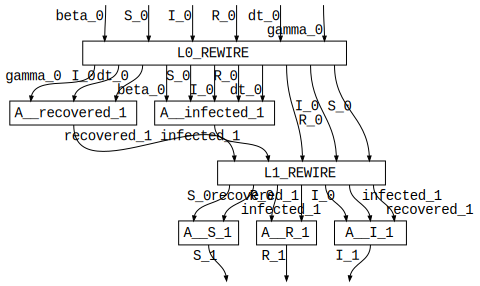

In [21]:
show_diagram(OUT_2)